In [1]:
import scanpy as sc
import numpy as np
import random
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)

data_path = "E:/STOmics/C04694D3_realign/outs/analysis/"
adata = sc.read_h5ad(data_path + "C04694D3.cellbin_1.0.h5ad")

array([[<Axes: title={'center': 'total_counts'}>]], dtype=object)

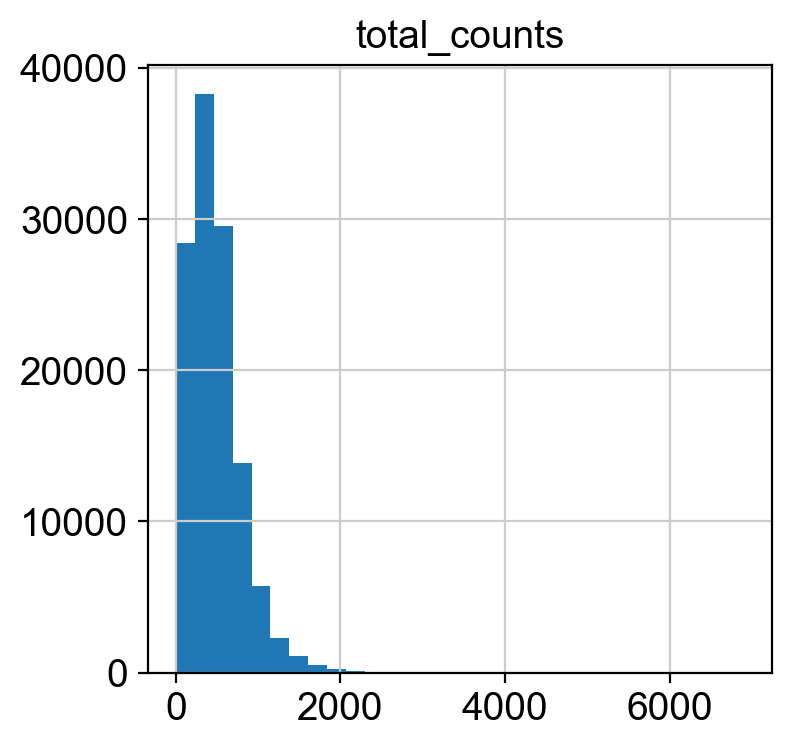

In [3]:
adata.obs[["total_counts"]].hist(bins=30)

In [6]:
from scipy.sparse import csc_matrix
from scipy.io import mmwrite
import gzip
import shutil

def compress_file(input_filename, output_filename):
    with open(input_filename, 'rb') as f_in:
        with gzip.open(output_filename, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

path = "E:/STOmics/seurat/Mouse/raw/"
bcs = adata.obs.index.to_frame()
gns = adata.var.index.to_frame()
X = adata.raw.X
mmwrite(path + "matrix.mtx", csc_matrix(X, dtype=np.int64).T, precision=1)
gns.to_csv(path + "features.tsv", index=False, header=False)
bcs.to_csv(path + "barcodes.tsv", index=False, header=False)
adata.obs[["y"]].to_csv(path + "x_coords.csv", index=False, header=False)
adata.obs[["x"]].to_csv(path + "y_coords.csv", index=False, header=False)
for fl in ["matrix.mtx", "features.tsv", "barcodes.tsv"]:
    compress_file(path + fl, path + fl + ".gz")

In [26]:
import pandas as pd

path = "E:/STOmics/seurat/Mouse/raw/"
bcs = pd.read_csv(path + "barcodes.tsv", header=None, names=["barcodes"])
X = pd.read_csv(path + "x_coords.csv", header=None, names=["X"])
Y = pd.read_csv(path + "y_coords.csv", header=None, names=["Y"])
coords = pd.concat((bcs, X, Y), axis=1)
coords.to_csv(path + "coords.tsv", index=False, header=True)
compress_file(path + "coords.tsv", path + "coords.tsv" + ".gz")

In [25]:
import gzip
import shutil

def compress_file(input_filename, output_filename):
    with open(input_filename, 'rb') as f_in:
        with gzip.open(output_filename, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)